# Paria Rezayan
# Clustering using k-means


# Introduction:
In this project, I will analyze a dataset of mall customers' behavior and preferences to identify different customer segments based on their annual income and spending score using the K-means algorithm. The aim is to aid mall management in understanding their customers' preferences better and improve services accordingly.

# Dataset:
The dataset used in this project can be found on https://www.kaggle.com/datasets/shwetabh123/mall-customers. The dataset contains 200 rows and 5 columns. The columns include CustomerID, Gender, Age, Annual Income (k$), and Spending Score (1-100).


# Objective:
My objective is to cluster customers based on their annual income and spending score to identify different customer segments.

# Methodology:
I employed the following methodology:

1. Data exploration: I explored the dataset by displaying its shape, additional information about the data types of each column, and the first 5 rows of the data. Additionally, a summary of statistics was generated using the data.describe() method.

2. Data Visualization and Preprocessing: Histograms of continuous variables were created to visualize data distribution and understand the underlying characteristics of the data. Furthermore, feature scaling was conducted using MinMaxScaler.

3. Model Implementation: Two different methods were employed to ascertain the optimal number of clusters - the elbow method and the silhouette method. Afterward, the K-means algorithm with 3, 4, and 5 clusters was implemented to segment the customers based on their annual income and spending score.

4. Model Evaluation: Within-Cluster Sum of Squares (WCSS) was used to evaluate the quality of our 3 clustering models with different numbers of clusters.

Steps:
1. Imported necessary libraries
2. Loaded the "Mall_Customers.csv" dataset
3. Explored the dataset
4. Visualized data distribution and performed feature scaling
5. Ascertained the optimal number of clusters using the elbow method and the silhouette method
6. Implemented the K-means algorithm with 3, 4, and 5 clusters
7. Evaluated the quality of our clustering models using WCSS


# Importing Libraries: 
Let's begin by importing necessary libraries, including numpy, pandas, seaborn, matplotlib.pyplot, sklearn.preprocessing, sklearn.cluster, and sklearn.metrics for our clustering project. 

In [91]:
# importing the necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

In [92]:
# loading the data 
data = pd.read_csv('Mall_customers.csv')

# Exploring the dataset:

Then, the dataset is explored by displaying its shape, additional information about the data types of each column using the data.info() method, and the first 5 rows using the data.head() method. Additionally, a summary of statistics is generated using data.describe() method:

In [93]:
# getting to know the dataset
data.shape

(200, 5)

The raw data consists of 200 rows and 5 columns.

Having known the shape of the data, it is time to familiarize ourselves with some additional information about the data:

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Attribute Information:

1) CustomerID
2) Gendre
3) Age 
4) Annual Income (k$)
5) Spending Score (1-100)

In [95]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [96]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [97]:
# checking for non-numeric data points
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

As demonstrated, all the features, except for "Genre" or the gender column, contain numerical integer values. 

Subsequently, further exploration is needed for checking for non-numeric data points in the columns and counting the total number of NaN values in the data frame. Unique variables in the columns are also explored using a for loop:

In [98]:
# cheking for total count of nan values
print(data.isnull().sum().sum())

0


In [123]:
# exploring the variables in the columns
var_names = ["CustomerID", "Genre", "Age", "Annual Income (k$)", "Spending Score (1-100)"]
for i in var_names:
    print(i)
    print(data[i].unique())

CustomerID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
Genre
['Male' 'Female']
Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 2

# Data Visualization and Preprocessing: 

Next, histograms of continuous variables are created to to visualize data ditribution and understand the underlying characteristics of the data:

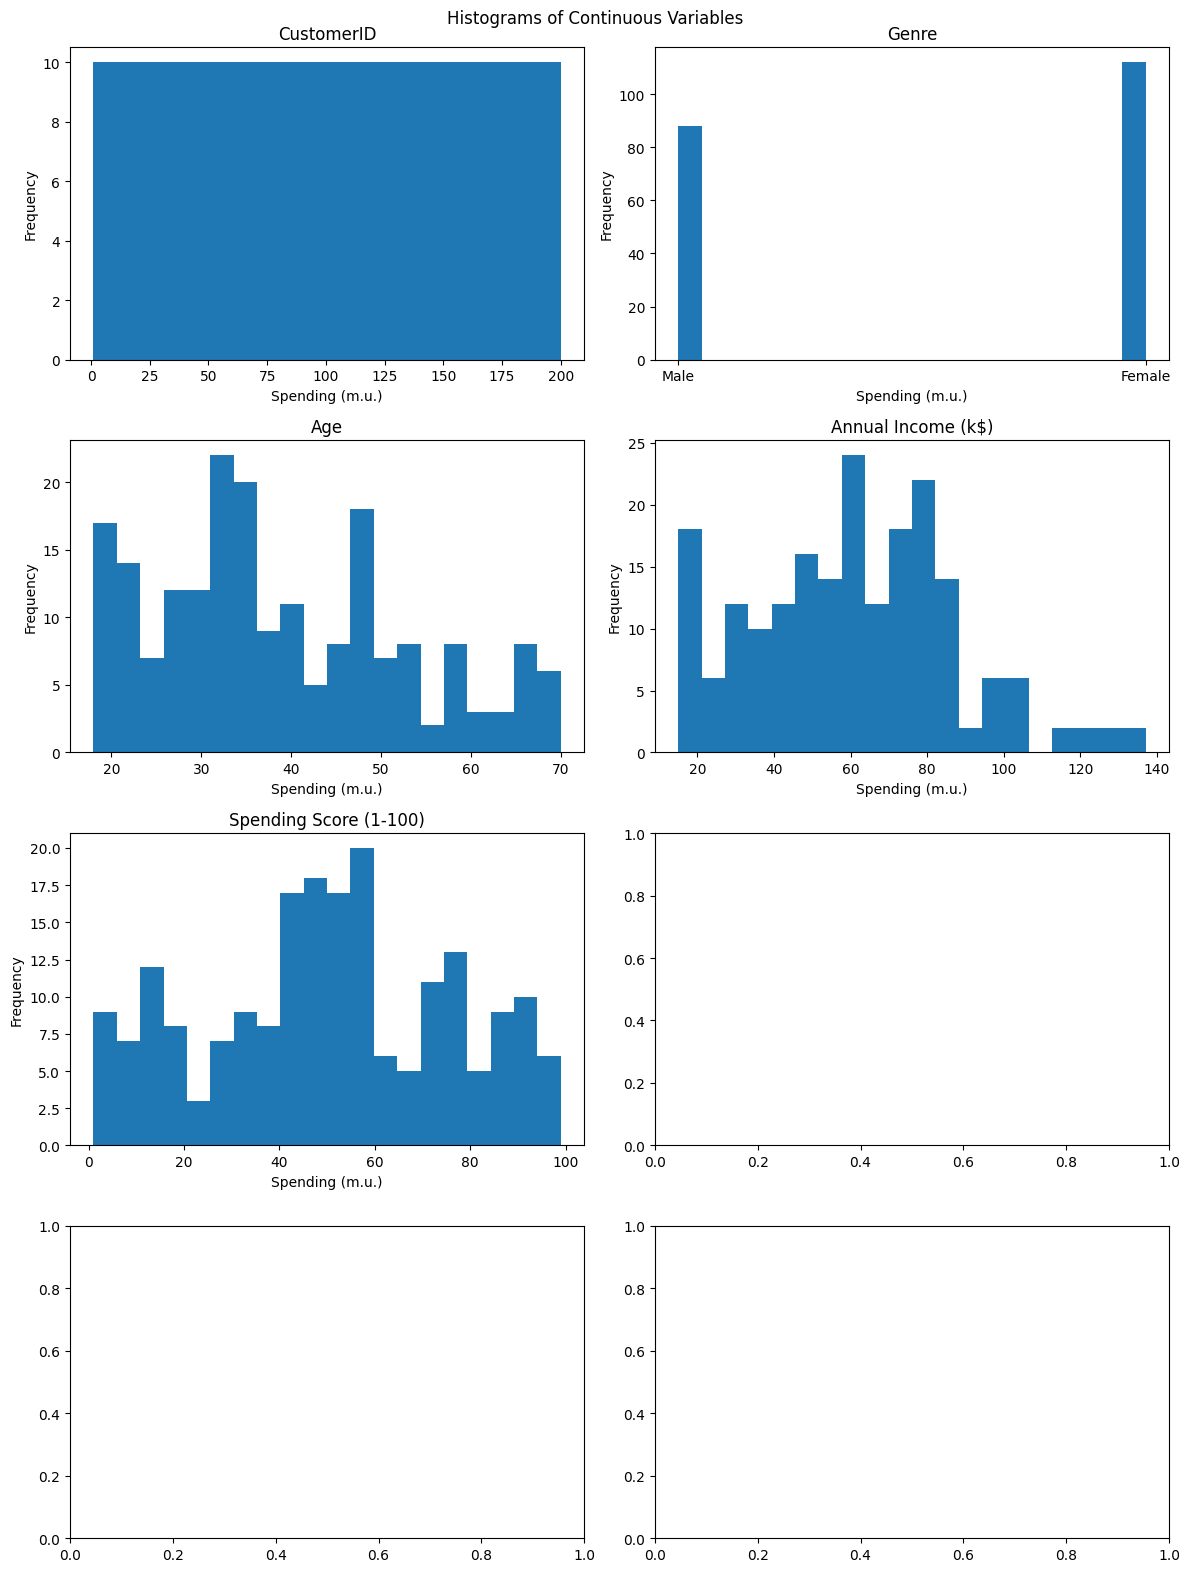

In [124]:
# creatting a figure with 4 rows and 2 columns of subplots to visualize data ditribution
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (12, 16))
for i, var in enumerate(var_names):
    row = i // 2 
    col = i % 2
    axs[row, col].hist(data[var], bins=20)
    axs[row, col].set_title(var)
    axs[row, col].set_xlabel("Spending (m.u.)")
    axs[row, col].set_ylabel("Frequency")
fig.suptitle("Histograms of Continuous Variables")
plt.tight_layout()
plt.show()

In [107]:
# defining the feature vector 
x = data.iloc[:, [3,4]].values

In [108]:
print(x[0:10])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]
 [18  6]
 [18 94]
 [19  3]
 [19 72]]


In [109]:
# feature scaling using MinMaxScaler
scaler = MinMaxScaler()
model = scaler.fit(x)
scaled_x = model.transform(x)
print(scaled_x)

[[0.         0.3877551 ]
 [0.         0.81632653]
 [0.00819672 0.05102041]
 [0.00819672 0.7755102 ]
 [0.01639344 0.39795918]
 [0.01639344 0.76530612]
 [0.02459016 0.05102041]
 [0.02459016 0.94897959]
 [0.03278689 0.02040816]
 [0.03278689 0.7244898 ]
 [0.03278689 0.13265306]
 [0.03278689 1.        ]
 [0.04098361 0.14285714]
 [0.04098361 0.7755102 ]
 [0.04098361 0.12244898]
 [0.04098361 0.79591837]
 [0.04918033 0.34693878]
 [0.04918033 0.66326531]
 [0.06557377 0.28571429]
 [0.06557377 0.98979592]
 [0.07377049 0.34693878]
 [0.07377049 0.73469388]
 [0.08196721 0.04081633]
 [0.08196721 0.73469388]
 [0.10655738 0.13265306]
 [0.10655738 0.82653061]
 [0.10655738 0.31632653]
 [0.10655738 0.6122449 ]
 [0.1147541  0.30612245]
 [0.1147541  0.87755102]
 [0.12295082 0.03061224]
 [0.12295082 0.73469388]
 [0.14754098 0.03061224]
 [0.14754098 0.92857143]
 [0.14754098 0.13265306]
 [0.14754098 0.81632653]
 [0.1557377  0.16326531]
 [0.1557377  0.73469388]
 [0.18032787 0.25510204]
 [0.18032787 0.75510204]


In [110]:
print(type(scaled_x))

<class 'numpy.ndarray'>


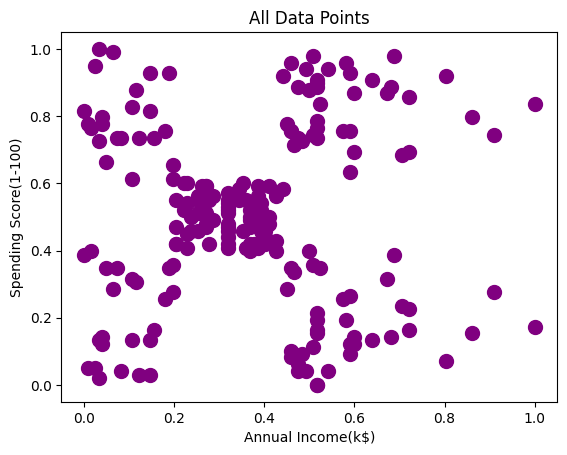

In [111]:
# visualising the data
plt.scatter(scaled_x[:, 0], scaled_x[:, 1], s = 100, c = 'purple', label ='Data Points')
plt.title('All Data Points')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# Model Implementation: 

Prior to traninging our K-means model, we need to asceratin the optimal number of clusters. Two different methods are employed for this objective: 

1. The Elbow Method:

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

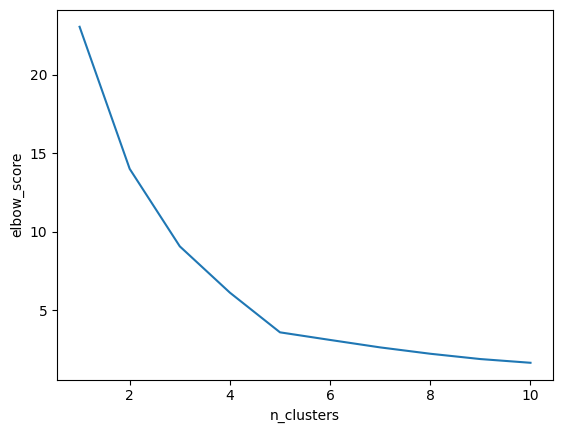

In [112]:
# using the elbow method for ascerting the number of clusters 
se = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, max_iter = 300)
    model.fit(scaled_x)
    se.append(model.inertia_)

# plotting the se values against the number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1,11),se)
plt.xlabel('n_clusters')
plt.ylabel('elbow_score')
plt.show()



2. The Silhouette Method:

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

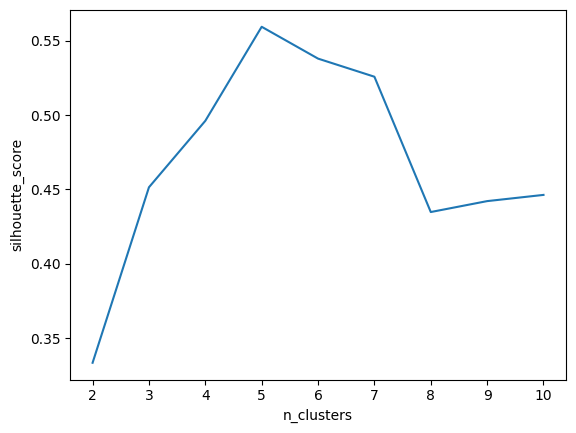

In [113]:
# using the silhouette method for ascerting the number of clusters 
ss = []
for i in range(2,11):
    model = KMeans(n_clusters = i, max_iter = 300)
    model.fit(scaled_x)
    s = silhouette_score(scaled_x, model.labels_)
    ss.append(s)

# plotting the ss values against the number of clusters    
plt.plot(range(2,11),ss)
plt.xlabel('n_clusters')
plt.ylabel('silhouette_score')
plt.show()


As demonstrated in the figures above, the optimal values for the numver of clusters are: 3, 4, and 5. 

* **K-means with 3 clusters**:

In [125]:
# K-means with 3 clusters and a maximum of 300 iterations
model = KMeans(n_clusters = 3, max_iter = 300)
y_kmeans = model.fit_predict(scaled_x)

# printing the predicted cluster labels
print(model.labels_)

# printing the coordinates of the centroids of the both clusters
print(model.cluster_centers_)

[1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]
[[0.46737705 0.1577551 ]
 [0.25631369 0.5426549 ]
 [0.58638083 0.82783883]]


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


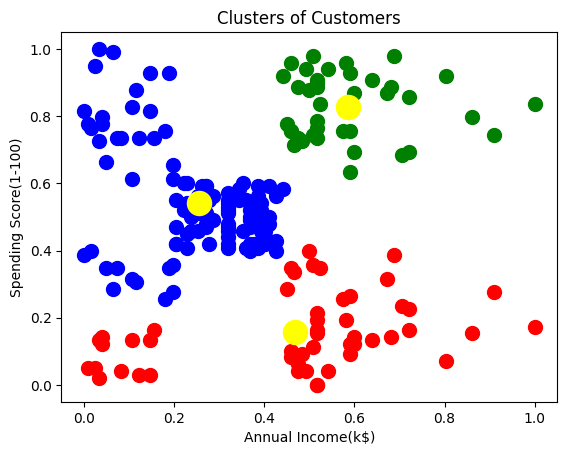

In [129]:
# visualising the clusters
plt.scatter(scaled_x[y_kmeans == 0, 0], scaled_x[y_kmeans == 0, 1], s = 100, c = 'red', label ='Cluster 1')
plt.scatter(scaled_x[y_kmeans==1, 0], scaled_x[y_kmeans == 1, 1], s = 100, c = 'blue', label ='Cluster 2')
plt.scatter(scaled_x[y_kmeans==2, 0], scaled_x[y_kmeans == 2, 1], s = 100, c ='green', label ='Cluster 3')

# plotting the centroid. This time we're going to use the cluster centres  
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

* **K-means with 4 clusters**:

In [130]:
# K-means with 4 clusters and a maximum of 300 iterations
model_2 = KMeans(n_clusters = 4, max_iter = 300)
model_2.fit(scaled_x)
y_kmeans_2 = model_2.fit_predict(scaled_x)

# printing the predicted cluster labels
print(model_2.labels_)

# printing the coordinates of the centroids of the all of the clusters
print(model_2.cluster_centers_)

[3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[[0.59016393 0.17991407]
 [0.58638083 0.82783883]
 [0.27262295 0.56612245]
 [0.09265859 0.20319432]]


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


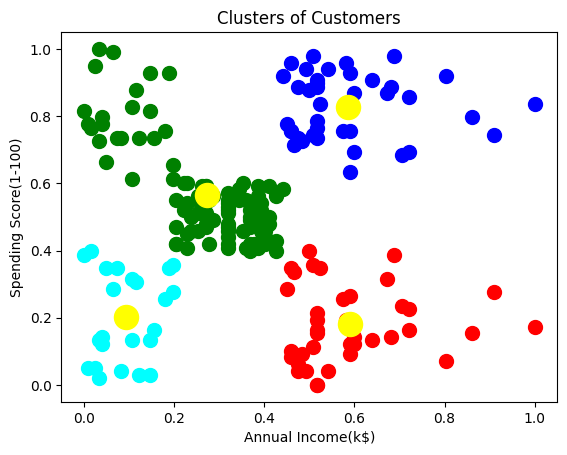

In [131]:
# visualising the clusters
plt.scatter(scaled_x[y_kmeans_2 == 0, 0], scaled_x[y_kmeans_2 == 0, 1], s = 100, c ='red', label ='Cluster 1')
plt.scatter(scaled_x[y_kmeans_2==1, 0], scaled_x[y_kmeans_2 == 1, 1], s = 100, c ='blue', label ='Cluster 2')
plt.scatter(scaled_x[y_kmeans_2==2, 0], scaled_x[y_kmeans_2 == 2, 1], s = 100, c ='green', label ='Cluster 3')
plt.scatter(scaled_x[y_kmeans_2==3, 0], scaled_x[y_kmeans_2==3, 1], s=100, c='cyan', label ='Cluster 4')

# plotting the centroid. This time we're going to use the cluster centres  
plt.scatter(model_2.cluster_centers_[:, 0], model_2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

* **K-means with 5 clusters**:

In [132]:
# K-means with 5 clusters and a maximum of 300 iterations
model_3 = KMeans(n_clusters = 5, max_iter = 300)
model_3.fit(scaled_x)
y_kmeans_3 = model_3.fit_predict(scaled_x)

# printing the predicted cluster labels
print(model_3.labels_)

# printing the coordinates of the centroids of the all of the clusters
print(model_3.cluster_centers_)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]
[[0.08792846 0.79962894]
 [0.6        0.16443149]
 [0.33029751 0.49508692]
 [0.58638083 0.82783883]
 [0.09265859 0.20319432]]


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


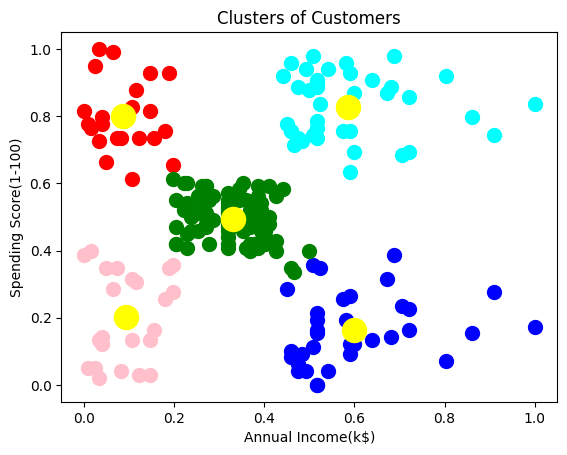

In [134]:
# visualising the clusters
plt.scatter(scaled_x[y_kmeans_3 == 0, 0], scaled_x[y_kmeans_3 == 0, 1], s = 100, c ='red', label ='Cluster 1')
plt.scatter(scaled_x[y_kmeans_3==1, 0], scaled_x[y_kmeans_3 == 1, 1], s = 100, c ='blue', label ='Cluster 2')
plt.scatter(scaled_x[y_kmeans_3==2, 0], scaled_x[y_kmeans_3 == 2, 1], s = 100, c ='green', label ='Cluster 3')
plt.scatter(scaled_x[y_kmeans_3==3, 0], scaled_x[y_kmeans_3==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(scaled_x[y_kmeans_3==4, 0], scaled_x[y_kmeans_3==4, 1], s=100, c='pink', label ='Cluster 5')

# plotting the centroid. This time we're going to use the cluster centres  
plt.scatter(model_3.cluster_centers_[:, 0], model_3.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

# Model Evaluation for 3, 4, and 5 clusters: 

Ultimatly, Within-Cluster Sum of Squares (WCSS) is used to evaluate the quality of our 3 clustering models with different number of clusters:

In [135]:
# computing wcss scores for different number of clusters 
print(model.inertia_)
print(model_2.inertia_)
print(model_3.inertia_)

9.058985215159455
6.110312266413656
3.583117905952561


In [138]:
# plotting the wcss scores for different numbers of clusters K-means 
clusters = [3, 4, 5]
wcss_scores = [model.inertia_, model_2.inertia_, model_3.inertia_]

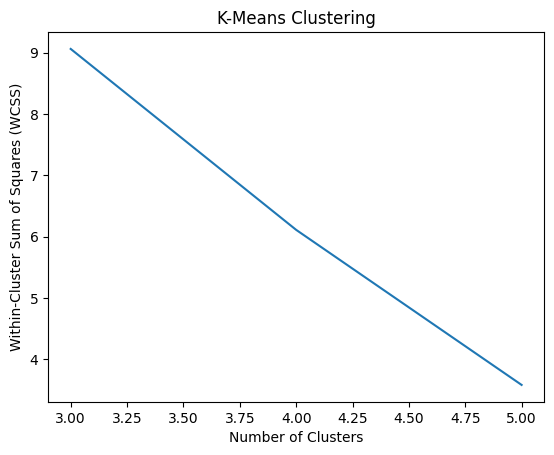

In [139]:
plt.plot(clusters, wcss_scores)
plt.title('K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Conclusion:
In conclusion, this project aimed to cluster mall customers based on their annual income and spending score to identify different customer segments. I employed the K-means algorithm with 3, 4, and 5 clusters and evaluated the quality of our clustering models using WCSS. Based on the results, 5 clusters seem to be the most efficient choice for this model implementation. This analysis can aid in mall management's decision-making process to improve services and better understand their customers' preferences.